In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import matplotlib.dates as mdates

In [2]:
df = pd.read_csv('R:/OwnCloud/WetScapes/2020_04_30_BGS_paper/Daten/DWDData_merged.csv')

In [3]:
df.head()

,timestamp,atemp,relhum,rgmin,rghourly,rg,prec
0,1991-11-13 18:00:00,NaN,NaN,NaN,NaN,NaN,0.0
1,1991-11-13 18:30:00,7.350000,71.000000,NaN,NaN,NaN,0.0
2,1991-11-13 19:00:00,7.133333,73.000000,NaN,NaN,NaN,0.0
3,1991-11-13 19:30:00,7.066667,74.666667,NaN,NaN,NaN,0.0
4,1991-11-13 20:00:00,6.900000,75.000000,NaN,NaN,NaN,0.0


In [4]:
df['date'] = pd.to_datetime(df['timestamp'])
df_temp = df.loc[:, ['atemp']]
df_temp = df_temp.set_index(df.date)
df_temp['atemp'] = pd.to_numeric(df_temp['atemp'],downcast='float',errors='coerce')

In [5]:
df_temp_1999_2019 = df_temp.loc['1999-01-01 00:00:00': '2018-12-31 23:30:00']
df_temp_1999_2019.tail()

,atemp
date,
2018-12-31 21:30:00,8.133333
2018-12-31 22:00:00,8.200000
2018-12-31 22:30:00,8.200000
2018-12-31 23:00:00,8.200000
2018-12-31 23:30:00,8.133333


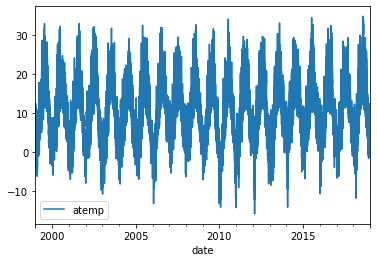

In [6]:
df_temp_1999_2019.plot()
plt.show()

               atemp
date                
1999-01-01 -1.145833
1999-01-02  0.831250
1999-01-03  3.395139
1999-01-04  4.485417
1999-01-05  9.352777


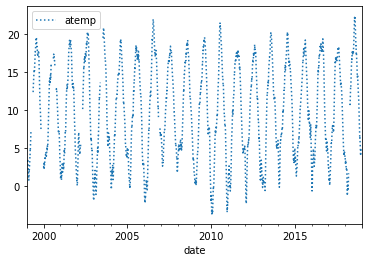

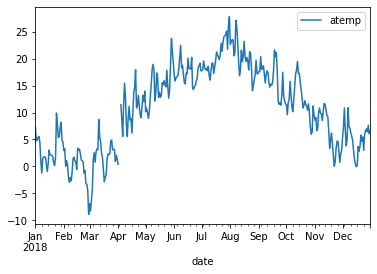

In [7]:
daily_temp = df_temp_1999_2019.resample('D').mean()
print(daily_temp.head())

daily_temp.rolling(30, center=True).mean().plot(style=[':', '--', '-'])

#daily_temp.to_csv('R:\\OwnCloud\\WetScapes\\2019_03_31_ERL_paper\\Artikel_ERL\\daily_temp.csv')

daily_temp_2018 = daily_temp.loc['2018-01-01':'2018-12-31']
daily_temp_2018.plot()
plt.show()

In [8]:
t_neu = daily_temp.copy()

In [9]:
t_neu.head()

,atemp
date,
1999-01-01,-1.145833
1999-01-02,0.831250
1999-01-03,3.395139
1999-01-04,4.485417
1999-01-05,9.352777


In [10]:
t_neu['Month'] = t_neu.index.month
t_neu['Year'] = t_neu.index.year

t_neu.head()



,atemp,Month,Year
date,,,
1999-01-01,-1.145833,1,1999
1999-01-02,0.831250,1,1999
1999-01-03,3.395139,1,1999
1999-01-04,4.485417,1,1999
1999-01-05,9.352777,1,1999


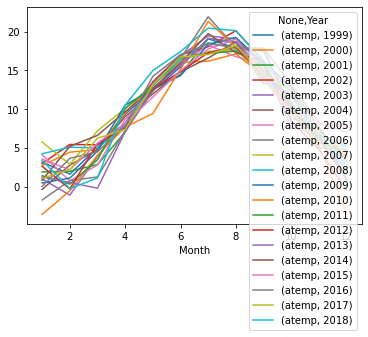

In [11]:
t_neu.groupby(['Month','Year']).mean().unstack().plot()

In [12]:
t_neu.index.day

Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10,
            ...
            22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
           dtype='int64', name='date', length=7305)

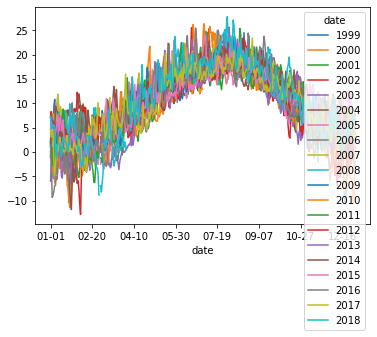

In [13]:
pv = pd.pivot_table(daily_temp, index=daily_temp.index.strftime('%m-%d'), columns=daily_temp.index.year, values='atemp', aggfunc='mean')
pv.plot()

In [14]:
pv.head()

date,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
date,,,,,,,,,,,,,,,,,,,,
01-01,-1.145833,2.206944,-0.502083,2.102083,-6.054167,-0.963889,3.952083,2.729861,8.290972,2.229861,1.078472,0.051389,1.550000,7.020139,7.276389,1.696528,4.589583,1.408333,4.619444,7.325695
01-02,0.831250,4.300694,2.916667,0.601389,-0.516667,0.509028,4.370139,2.660417,5.293750,0.339583,0.393750,-1.014583,-0.602083,8.254861,5.204167,4.260417,6.302083,-2.847222,3.052083,4.721528
01-03,3.395139,7.436111,4.991667,-2.768055,-0.320139,-0.115278,4.774305,0.460417,6.195139,-4.340278,0.797222,-3.976389,-2.768750,4.900000,7.125000,6.403472,4.852778,-9.341666,4.709722,4.919445
01-04,4.485417,5.027083,2.484722,-5.325000,-2.970833,-3.219445,7.335417,0.813194,7.842361,-5.247222,0.831250,-4.304167,0.600694,5.289583,6.350694,6.385417,4.652083,-8.913889,3.779861,5.377778
01-05,9.352777,4.589583,5.068750,-2.698611,-5.396528,-5.504167,5.879167,0.905556,7.417361,-0.894444,-2.075695,-2.967361,-2.950000,4.974306,5.016667,4.612500,4.606945,-8.120139,-2.275694,5.560417


In [15]:
pv_99_17 = pv.copy()
pv_99_17 = pv_99_17.drop(columns=[2018])

pv_99_17.head()

date,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
date,,,,,,,,,,,,,,,,,,,
01-01,-1.145833,2.206944,-0.502083,2.102083,-6.054167,-0.963889,3.952083,2.729861,8.290972,2.229861,1.078472,0.051389,1.550000,7.020139,7.276389,1.696528,4.589583,1.408333,4.619444
01-02,0.831250,4.300694,2.916667,0.601389,-0.516667,0.509028,4.370139,2.660417,5.293750,0.339583,0.393750,-1.014583,-0.602083,8.254861,5.204167,4.260417,6.302083,-2.847222,3.052083
01-03,3.395139,7.436111,4.991667,-2.768055,-0.320139,-0.115278,4.774305,0.460417,6.195139,-4.340278,0.797222,-3.976389,-2.768750,4.900000,7.125000,6.403472,4.852778,-9.341666,4.709722
01-04,4.485417,5.027083,2.484722,-5.325000,-2.970833,-3.219445,7.335417,0.813194,7.842361,-5.247222,0.831250,-4.304167,0.600694,5.289583,6.350694,6.385417,4.652083,-8.913889,3.779861
01-05,9.352777,4.589583,5.068750,-2.698611,-5.396528,-5.504167,5.879167,0.905556,7.417361,-0.894444,-2.075695,-2.967361,-2.950000,4.974306,5.016667,4.612500,4.606945,-8.120139,-2.275694


In [16]:

pv_18 = pd.DataFrame()
pv_18[2018] = pv[2018]

pv_99_17['max'] = pv.max(axis=1)
pv_99_17['min'] = pv.min(axis=1)

pv_ges = pd.DataFrame()
pv_ges[2018] = pv_18[2018]
pv_ges['min'] = pv_99_17['min']
pv_ges['max'] = pv_99_17['max']
pv_ges.head()


,2018,min,max
date,,,
01-01,7.325695,-6.054167,8.290972
01-02,4.721528,-2.847222,8.254861
01-03,4.919445,-9.341666,7.436111
01-04,5.377778,-8.913889,7.842361
01-05,5.560417,-8.120139,9.352777


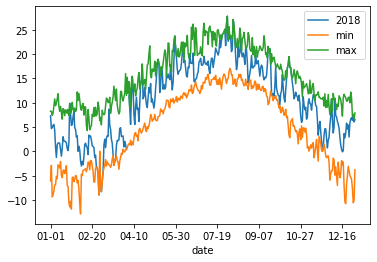

In [17]:
pv_ges.plot()

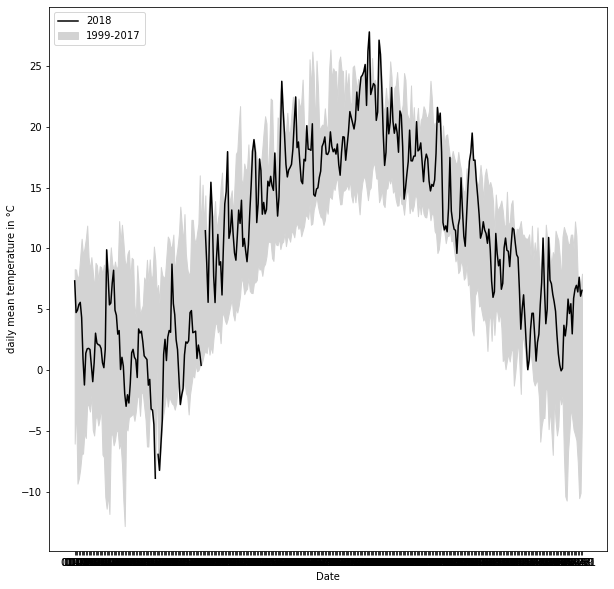

In [18]:
fig = plt.figure(figsize=(10,10))
ax = plt.axes()

x = pv_ges.index
ax.plot(x, pv_ges[2018], color='black', label='2018');
ax.fill_between(x, pv_ges['min'], pv_ges['max'], color='lightgray', label='1999-2017')

ax.legend(loc='upper left')

ax.set_ylabel('daily mean temperature in °C')
ax.set_xlabel('Date')

#plt.savefig('R:\\OwnCloud\\WetScapes\\2019_03_31_ERL_paper\\ArtikelERL_english\\figures\\prec_cumsum_area.png', dpi=300, quality=95, format="png")

plt.show()

In [19]:
series_temp = pd.Series(daily_temp['atemp'])
# 2012 ist ein schaltjahr --> 29.2.2012 wir rausgelöscht

test1_ = series_temp.loc['1999-01-01':'2000-02-28']
test2_ = series_temp.loc['2000-03-01':'2004-02-28']
test3_ = series_temp.loc['2004-03-01':'2008-02-28']
test4_ = series_temp.loc['2008-03-01':'2012-02-28']
test5_ = series_temp.loc['2012-03-01':'2016-02-28']
test6_ = series_temp.loc['2016-03-01':'2018-12-31']

test_ = pd.concat([test1_,test2_,test3_,test4_,test5_,test6_])

series_temp_ = test_


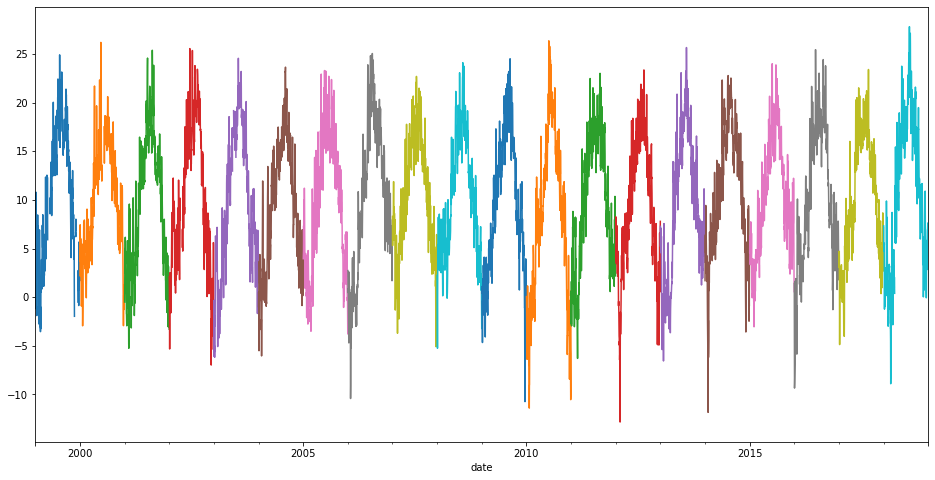

In [20]:
groups = series_temp_.groupby(pd.Grouper(freq='A'))
groups.plot(figsize=(16,8))

#plt.savefig('R:\\OwnCloud\\WetScapes\\2019_03_31_ERL_paper\\Artikel_ERL\\figures\\Niederschlag2009-18_absolut.png', dpi=300, quality=95, format="png")
plt.show()

In [21]:
groups.head()

date
1999-01-01   -1.145833
1999-01-02    0.831250
1999-01-03    3.395139
1999-01-04    4.485417
1999-01-05    9.352777
                ...   
2018-01-01    7.325695
2018-01-02    4.721528
2018-01-03    4.919445
2018-01-04    5.377778
2018-01-05    5.560417
Name: atemp, Length: 100, dtype: float32

In [22]:
groups.count()

date
1999-12-31    324
2000-12-31    350
2001-12-31    365
2002-12-31    351
2003-12-31    355
2004-12-31    365
2005-12-31    365
2006-12-31    362
2007-12-31    365
2008-12-31    365
2009-12-31    365
2010-12-31    365
2011-12-31    365
2012-12-31    365
2013-12-31    365
2014-12-31    365
2015-12-31    365
2016-12-31    365
2017-12-31    365
2018-12-31    363
Freq: A-DEC, Name: atemp, dtype: int64

In [23]:
ann_temp = {}
for name,group in groups:
    ann_temp[name.year] = group.mean().round()


ann_temp

{1999: 11.0,
 2000: 10.0,
 2001: 9.0,
 2002: 10.0,
 2003: 9.0,
 2004: 10.0,
 2005: 10.0,
 2006: 10.0,
 2007: 10.0,
 2008: 10.0,
 2009: 10.0,
 2010: 8.0,
 2011: 10.0,
 2012: 9.0,
 2013: 9.0,
 2014: 11.0,
 2015: 10.0,
 2016: 10.0,
 2017: 10.0,
 2018: 11.0}

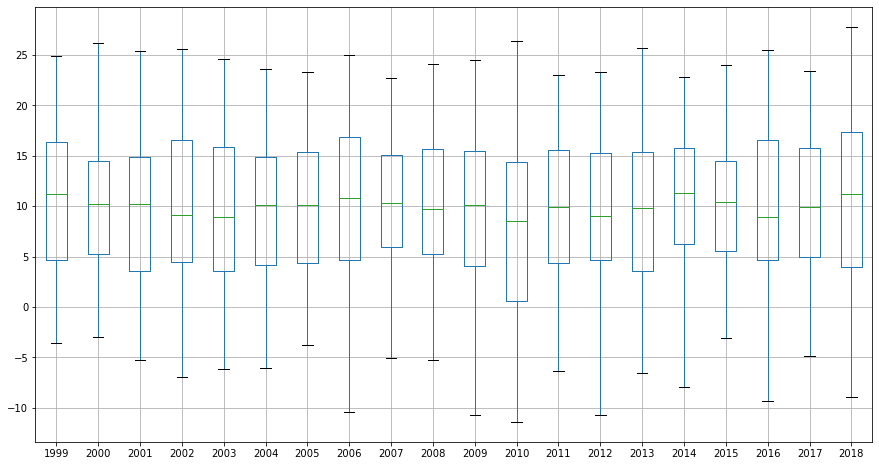

In [24]:
years = pd.DataFrame()

for name, group in groups:
    years[name.year] = group.values

years.boxplot(showfliers=False, figsize=(15,8))

#plt.savefig('R:\\OwnCloud\\WetScapes\\2019_03_31_ERL_paper\\Artikel_ERL\\figures\\Niederschlag2009-18_boxplot.png', dpi=300, quality=95, format="png")
plt.show()

In [25]:
temp_1999 = daily_temp.loc['1999-01-01': '1999-12-31']
temp_2000 = daily_temp.loc['2000-01-01': '2000-12-31']
temp_2001 = daily_temp.loc['2001-01-01': '2001-12-31']
temp_2002 = daily_temp.loc['2002-01-01': '2002-12-31']
temp_2003 = daily_temp.loc['2003-01-01': '2003-12-31']
temp_2004 = daily_temp.loc['2004-01-01': '2004-12-31']
temp_2005 = daily_temp.loc['2005-01-01': '2005-12-31']
temp_2006 = daily_temp.loc['2006-01-01': '2006-12-31']
temp_2007 = daily_temp.loc['2007-01-01': '2007-12-31']
temp_2008 = daily_temp.loc['2008-01-01': '2008-12-31']
temp_2009 = daily_temp.loc['2009-01-01': '2009-12-31']
temp_2010 = daily_temp.loc['2010-01-01': '2010-12-31']
temp_2011 = daily_temp.loc['2011-01-01': '2011-12-31']
temp_2012 = daily_temp.loc['2012-01-01': '2012-12-31']
temp_2013 = daily_temp.loc['2013-01-01': '2013-12-31']
temp_2014 = daily_temp.loc['2014-01-01': '2014-12-31']
temp_2015 = daily_temp.loc['2015-01-01': '2015-12-31']
temp_2016 = daily_temp.loc['2016-01-01': '2016-12-31']
temp_2017 = daily_temp.loc['2017-01-01': '2017-12-31']
temp_2018 = daily_temp.loc['2018-01-01': '2018-12-31']

temp_1999 = temp_1999.reset_index()
temp_2000 = temp_2000.reset_index()
temp_2001 = temp_2001.reset_index()
temp_2002 = temp_2002.reset_index()
temp_2003 = temp_2003.reset_index()
temp_2004 = temp_2004.reset_index()
temp_2005 = temp_2005.reset_index()
temp_2006 = temp_2006.reset_index()
temp_2007 = temp_2007.reset_index()
temp_2008 = temp_2008.reset_index()
temp_2009 = temp_2009.reset_index()
temp_2010 = temp_2010.reset_index()
temp_2011 = temp_2011.reset_index()
temp_2012 = temp_2012.reset_index()
temp_2013 = temp_2013.reset_index()
temp_2014 = temp_2014.reset_index()
temp_2015 = temp_2015.reset_index()
temp_2016 = temp_2016.reset_index()
temp_2017 = temp_2017.reset_index()
temp_2018 = temp_2018.reset_index()


merge_table = pd.DataFrame()
merge_table['1999'] = temp_1999['atemp']
merge_table['2000'] = temp_2000['atemp']
merge_table['2001'] = temp_2001['atemp']
merge_table['2002'] = temp_2002['atemp']
merge_table['2003'] = temp_2003['atemp']
merge_table['2004'] = temp_2004['atemp']
merge_table['2005'] = temp_2005['atemp']
merge_table['2006'] = temp_2006['atemp']
merge_table['2007'] = temp_2007['atemp']
merge_table['2008'] = temp_2008['atemp']
merge_table['2009'] = temp_2009['atemp']
merge_table['2010'] = temp_2010['atemp']
merge_table['2011'] = temp_2011['atemp']
merge_table['2012'] = temp_2012['atemp']
merge_table['2013'] = temp_2013['atemp']
merge_table['2014'] = temp_2014['atemp']
merge_table['2015'] = temp_2015['atemp']
merge_table['2016'] = temp_2016['atemp']
merge_table['2017'] = temp_2017['atemp']
merge_table['2018'] = temp_2018['atemp']

merge_table.head()

,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,-1.145833,2.206944,-0.502083,2.102083,-6.054167,-0.963889,3.952083,2.729861,8.290972,2.229861,1.078472,0.051389,1.550000,7.020139,7.276389,1.696528,4.589583,1.408333,4.619444,7.325695
1,0.831250,4.300694,2.916667,0.601389,-0.516667,0.509028,4.370139,2.660417,5.293750,0.339583,0.393750,-1.014583,-0.602083,8.254861,5.204167,4.260417,6.302083,-2.847222,3.052083,4.721528
2,3.395139,7.436111,4.991667,-2.768055,-0.320139,-0.115278,4.774305,0.460417,6.195139,-4.340278,0.797222,-3.976389,-2.768750,4.900000,7.125000,6.403472,4.852778,-9.341666,4.709722,4.919445
3,4.485417,5.027083,2.484722,-5.325000,-2.970833,-3.219445,7.335417,0.813194,7.842361,-5.247222,0.831250,-4.304167,0.600694,5.289583,6.350694,6.385417,4.652083,-8.913889,3.779861,5.377778
4,9.352777,4.589583,5.068750,-2.698611,-5.396528,-5.504167,5.879167,0.905556,7.417361,-0.894444,-2.075695,-2.967361,-2.950000,4.974306,5.016667,4.612500,4.606945,-8.120139,-2.275694,5.560417


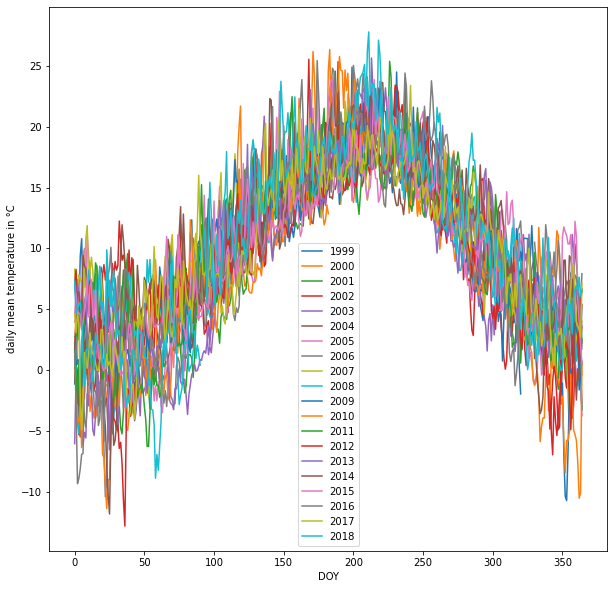

In [26]:
merge_table.plot(figsize=[10,10])
plt.ylabel('daily mean temperature in °C')
plt.xlabel('DOY')
#plt.savefig('R:\\OwnCloud\\WetScapes\\2019_03_31_ERL_paper\\Artikel_ERL\\figures\\prec_cumsum.png', dpi=300, quality=95, format="png")
plt.show()

In [27]:
merge_table_99_17 = merge_table.copy()
merge_table_99_17 = merge_table_99_17.drop(columns=['2018'])
merge_table_99_17.head()

,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,-1.145833,2.206944,-0.502083,2.102083,-6.054167,-0.963889,3.952083,2.729861,8.290972,2.229861,1.078472,0.051389,1.550000,7.020139,7.276389,1.696528,4.589583,1.408333,4.619444
1,0.831250,4.300694,2.916667,0.601389,-0.516667,0.509028,4.370139,2.660417,5.293750,0.339583,0.393750,-1.014583,-0.602083,8.254861,5.204167,4.260417,6.302083,-2.847222,3.052083
2,3.395139,7.436111,4.991667,-2.768055,-0.320139,-0.115278,4.774305,0.460417,6.195139,-4.340278,0.797222,-3.976389,-2.768750,4.900000,7.125000,6.403472,4.852778,-9.341666,4.709722
3,4.485417,5.027083,2.484722,-5.325000,-2.970833,-3.219445,7.335417,0.813194,7.842361,-5.247222,0.831250,-4.304167,0.600694,5.289583,6.350694,6.385417,4.652083,-8.913889,3.779861
4,9.352777,4.589583,5.068750,-2.698611,-5.396528,-5.504167,5.879167,0.905556,7.417361,-0.894444,-2.075695,-2.967361,-2.950000,4.974306,5.016667,4.612500,4.606945,-8.120139,-2.275694


In [28]:
merge_table_18 = pd.DataFrame()
merge_table_18['2018'] = merge_table['2018']
print(merge_table_18.head())


       2018
0  7.325695
1  4.721528
2  4.919445
3  5.377778
4  5.560417


In [29]:
merge_table_99_17['max'] = merge_table_99_17.max(axis=1)
merge_table_99_17['min'] = merge_table_99_17.min(axis=1)

merge_table_99_17.head()

,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2010,2011,2012,2013,2014,2015,2016,2017,max,min
0,-1.145833,2.206944,-0.502083,2.102083,-6.054167,-0.963889,3.952083,2.729861,8.290972,2.229861,...,0.051389,1.550000,7.020139,7.276389,1.696528,4.589583,1.408333,4.619444,8.290972,-6.054167
1,0.831250,4.300694,2.916667,0.601389,-0.516667,0.509028,4.370139,2.660417,5.293750,0.339583,...,-1.014583,-0.602083,8.254861,5.204167,4.260417,6.302083,-2.847222,3.052083,8.254861,-2.847222
2,3.395139,7.436111,4.991667,-2.768055,-0.320139,-0.115278,4.774305,0.460417,6.195139,-4.340278,...,-3.976389,-2.768750,4.900000,7.125000,6.403472,4.852778,-9.341666,4.709722,7.436111,-9.341666
3,4.485417,5.027083,2.484722,-5.325000,-2.970833,-3.219445,7.335417,0.813194,7.842361,-5.247222,...,-4.304167,0.600694,5.289583,6.350694,6.385417,4.652083,-8.913889,3.779861,7.842361,-8.913889
4,9.352777,4.589583,5.068750,-2.698611,-5.396528,-5.504167,5.879167,0.905556,7.417361,-0.894444,...,-2.967361,-2.950000,4.974306,5.016667,4.612500,4.606945,-8.120139,-2.275694,9.352777,-8.120139


In [30]:
temp_cum = pd.DataFrame()
temp_cum['2018'] = merge_table_18['2018']
temp_cum['min'] = merge_table_99_17['min']
temp_cum['max'] = merge_table_99_17['max']
temp_cum.head()

,2018,min,max
0,7.325695,-6.054167,8.290972
1,4.721528,-2.847222,8.254861
2,4.919445,-9.341666,7.436111
3,5.377778,-8.913889,7.842361
4,5.560417,-8.120139,9.352777


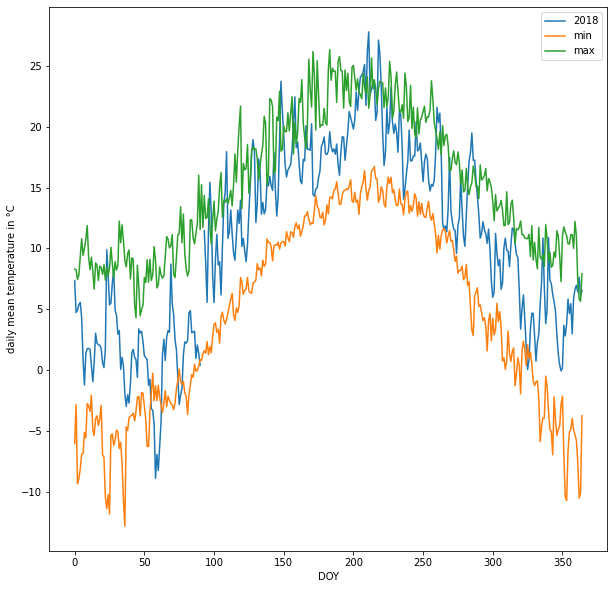

In [31]:
temp_cum.plot(figsize=[10,10])
plt.ylabel('daily mean temperature in °C')
plt.xlabel('DOY')
plt.show()

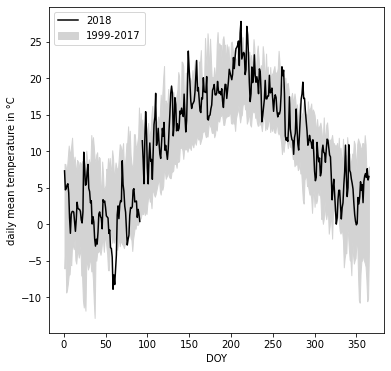

In [32]:
fig = plt.figure(figsize=(6,6))
ax = plt.axes()

x = np.arange(1,366)
ax.plot(x, temp_cum['2018'], color='black', label='2018');
ax.fill_between(x, temp_cum['min'], temp_cum['max'], color='lightgray', label='1999-2017')

ax.legend(loc='upper left')

ax.set_ylabel('daily mean temperature in °C')
ax.set_xlabel('DOY')

#plt.savefig('R:\\OwnCloud\\WetScapes\\2019_03_31_ERL_paper\\ArtikelERL_english\\figures\\prec_cumsum_area.png', dpi=300, quality=95, format="png")

plt.show()

In [33]:
merge_table_99_17_without = merge_table_99_17.drop(columns=['min','max'])
merge_table_99_17_without.head()

,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,-1.145833,2.206944,-0.502083,2.102083,-6.054167,-0.963889,3.952083,2.729861,8.290972,2.229861,1.078472,0.051389,1.550000,7.020139,7.276389,1.696528,4.589583,1.408333,4.619444
1,0.831250,4.300694,2.916667,0.601389,-0.516667,0.509028,4.370139,2.660417,5.293750,0.339583,0.393750,-1.014583,-0.602083,8.254861,5.204167,4.260417,6.302083,-2.847222,3.052083
2,3.395139,7.436111,4.991667,-2.768055,-0.320139,-0.115278,4.774305,0.460417,6.195139,-4.340278,0.797222,-3.976389,-2.768750,4.900000,7.125000,6.403472,4.852778,-9.341666,4.709722
3,4.485417,5.027083,2.484722,-5.325000,-2.970833,-3.219445,7.335417,0.813194,7.842361,-5.247222,0.831250,-4.304167,0.600694,5.289583,6.350694,6.385417,4.652083,-8.913889,3.779861
4,9.352777,4.589583,5.068750,-2.698611,-5.396528,-5.504167,5.879167,0.905556,7.417361,-0.894444,-2.075695,-2.967361,-2.950000,4.974306,5.016667,4.612500,4.606945,-8.120139,-2.275694


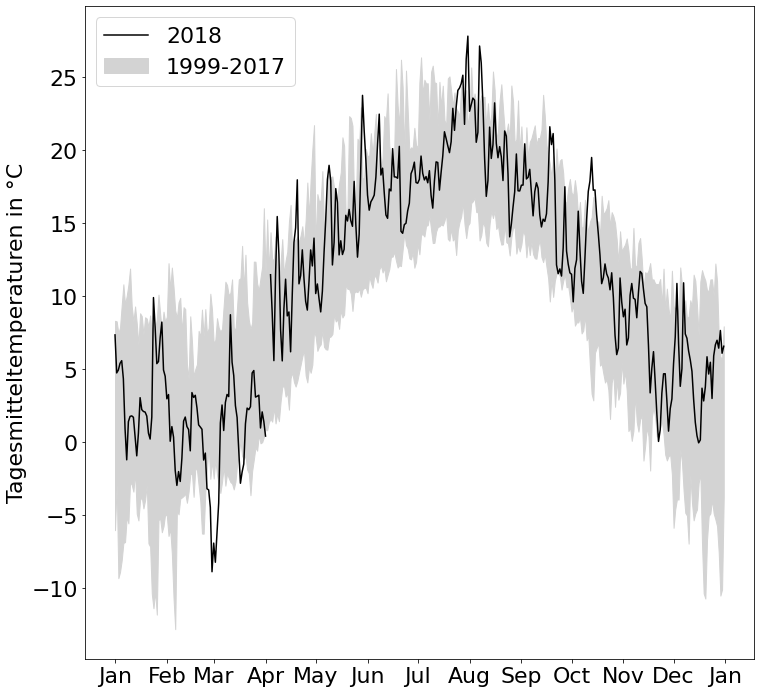

In [35]:
# Set the locator
locator = mdates.MonthLocator()  # every month
# Specify the format - %b gives us Jan, Feb...
fmt = mdates.DateFormatter('%b')


plt.rcParams.update({'font.size': 22})

fig = plt.figure(figsize=(12,12))
ax = plt.axes()

numdays = 365
base = datetime.datetime(2018, 1, 1, 0, 0, 0, 0)
x = [base + datetime.timedelta(days=x) for x in range(0,numdays)]

ax.fill_between(x, temp_cum['min'], temp_cum['max'], color='lightgray', label='1999-2017')
#ax.plot(x, merge_table_99_17_without, color='grey', linewidth=0.3)
ax.plot(x, temp_cum['2018'], color='black', label='2018');
ax.legend(loc='upper left')

ax.set_ylabel('Tagesmitteltemperaturen in °C')
#ax.set_xlabel('DOY')

X = plt.gca().xaxis
X.set_major_locator(locator)
# Specify formatter
X.set_major_formatter(fmt)


plt.savefig('R:/OwnCloud/DissBeyer/Diss2020/Arbeit/Abbildungen/05_Ergebnisse/paw_temperatur.png', dpi=300, quality=95, format="png")

plt.show()

In [37]:
temp_cum.tail()

,2018,min,max
360,6.959722,-5.775694,11.010417
361,6.418056,-7.582639,7.302083
362,7.627083,-10.534028,5.834028
363,6.067361,-10.099305,5.650694
364,6.548611,-3.758333,7.918056


In [39]:
def compose_date(years, months=1, days=1, weeks=None, hours=None, minutes=None,
                 seconds=None, milliseconds=None, microseconds=None, nanoseconds=None):
    years = np.asarray(years) - 1970
    months = np.asarray(months) - 1
    days = np.asarray(days) - 1
    types = ('<M8[Y]', '<m8[M]', '<m8[D]', '<m8[W]', '<m8[h]',
             '<m8[m]', '<m8[s]', '<m8[ms]', '<m8[us]', '<m8[ns]')
    vals = (years, months, days, weeks, hours, minutes, seconds,
            milliseconds, microseconds, nanoseconds)
    return sum(np.asarray(v, dtype=t) for t, v in zip(types, vals)
               if v is not None)



In [ ]:
df = pd.DataFrame({'doy': [49, 65, 81, 97, 113, 129, 145, 161],
                   'year': [2000, 2000, 2000, 2001, 2001, 2001, 2001, 2001]})

df.index = compose_date(df['year'], days=df['doy'])

In [50]:

temp_test = temp_cum.copy()

In [51]:
temp_test['year'] = 2018 


In [52]:
temp_test['doy'] = np.arange(len(temp_test))+1

In [53]:
temp_test.index = compose_date(temp_test['year'], days=temp_test['doy'])

In [55]:
temp_test.head()

,2018,min,max,year,doy
2018-01-01,7.325695,-6.054167,8.290972,2018,1
2018-01-02,4.721528,-2.847222,8.254861,2018,2
2018-01-03,4.919445,-9.341666,7.436111,2018,3
2018-01-04,5.377778,-8.913889,7.842361,2018,4
2018-01-05,5.560417,-8.120139,9.352777,2018,5


In [61]:
rolling45_2018 = temp_test['2018'].rolling('20d').mean()
rolling45_min = temp_test['min'].rolling('20d').mean()
rolling45_max = temp_test['max'].rolling('20d').mean()

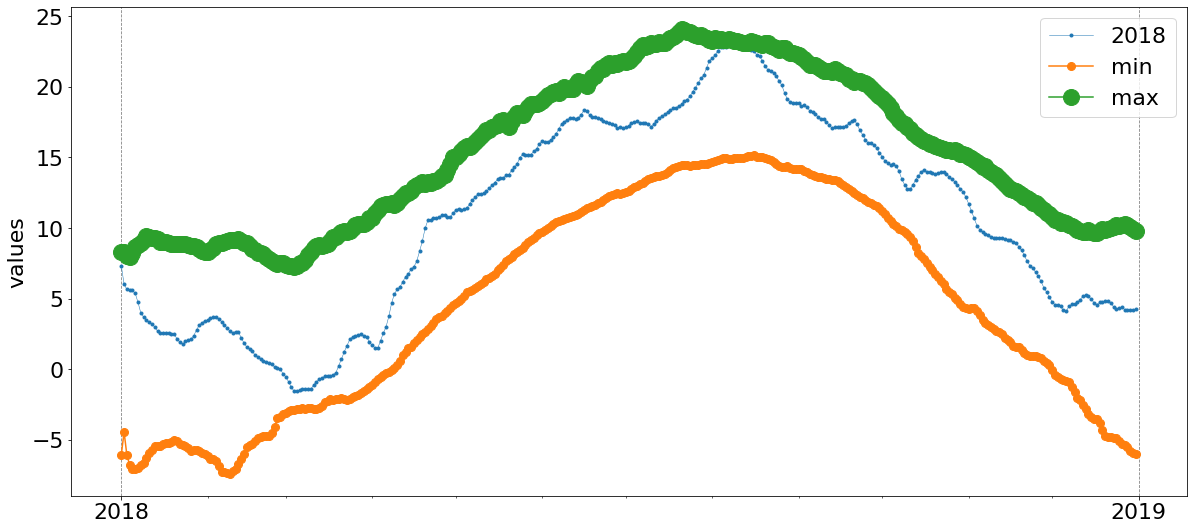

In [62]:
fig, ax = plt.subplots(figsize=(20,9))
ax.plot(rolling45_2018,marker='.', linestyle='-', linewidth=0.5, label='2018')
ax.plot(rolling45_min, marker='o', markersize=8, linestyle='-', label='min')
ax.plot(rolling45_max, marker='o', markersize=16, linestyle='-', label='max')

#ax.plot(indizes_all_mean_rolling90.loc[start:end, 'ndvi'],marker='.', linestyle='-', label='NDVI 90-d Rolling Mean')
#ax.plot(indizes_all_mean_rolling180.loc[start:end, 'ndvi'],marker='.', linestyle='-', label='NDVI 180-d Rolling Mean')
#ax.plot(indizes_all_mean_rolling360.loc[start:end, 'ndvi'],marker='.', linestyle='-', label='NDVI 360-d Rolling Mean')


ax.set_ylabel('values')

ax.xaxis.grid(color = 'grey', linestyle='--')

ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.xaxis.set_minor_locator(mdates.MonthLocator())

ax.legend();